## Introduction


For freshers, projects are the best way to highlight their data science knowledge. In fact, not just freshers, up to mid-level experienced professionals can keep their resumes updated with new, interesting projects. After all, they don't come easy. It takes a lot of time to create a project which can truly showcase the depth and breadth of your knowledge.

I hope this project will help you gain much needed knowledge and help your resume get shortlisted faster. This project shows all the steps (from scratch) taken to solve a Machine Learning problem. For your understanding, I've taken a simple yet challenging data set where you can engineer features at your discretion as well.

We'll participate in a Kaggle competition and make our way up the leaderboard among ~ top 14% participants.

This project is most suitable for people who have a basic understanding of python and Machine Learning. Even if you are absolutely new to it, give it a try. And ask questions in Comments below. R users can refer to this equivalent R script and follow the explanation given below.

## Table of Contents


1. Process of Machine Learning Predictions
2. World Happiness Data Set
    - Understand the problem
    - Hypothesis Generation
    - Get Data
    - Data Exploration
    - Data Pre-Processing
    - Feature Engineering - Create 331 new features
    - Model Training - XGBoost, Neural Network, Lasso
    - Model Evaluation

## Process of Machine Learning Predictions


“Keep tormenting data until it starts revealing its hidden secrets.” Yes, it can be done but there's a way around it. Making predictions using Machine Learning isn't just about grabbing the data and feeding it to algorithms. The algorithm might spit out some prediction but that's not what you are aiming for. The difference between good data science professionals and naive data science aspirants is that the former set follows this process religiously. The process is as follows:


### 1. Understand the problem: 
Before getting the data, we need to understand the problem we are trying to solve. If you know the domain, think of which factors could play an epic role in solving the problem. If you don't know the domain, read about it. 

### 2. Hypothesis Generation: 
This is quite important, yet it is often forgotten. In simple words, hypothesis generation refers to creating a set of features which could influence the target variable given a confidence interval ( taken as 95% all the time). We can do this before looking at the data to avoid biased thoughts. This step often helps in creating new features. 

### 3. Get Data: 
Now, we download the data and look at it. Determine which features are available and which aren't, how many features we generated in hypothesis generation hit the mark, and which ones could be created. Answering these questions will set us on the right track. 

### 4. Data Exploration: 
We can't determine everything by just looking at the data. We need to dig deeper. This step helps us understand the nature of variables (skewed, missing, zero variance feature) so that they can be treated properly. It involves creating charts, graphs (univariate and bivariate analysis), and cross-tables to understand the behavior of 
features.

### 5. Data Preprocessing: 
Here, we impute missing values and clean string variables (remove space, irregular tabs, data time format) and anything that shouldn't be there. This step is usually followed along with the data exploration stage. 

### 6. Feature Engineering: 
Now, we create and add new features to the data set. Most of the ideas for these features come during the hypothesis generation stage. 

### 7. Model Training: 
Using a suitable algorithm, we train the model on the given data set. 

### 8. Model Evaluation: 

Once the model is trained, we evaluate the model's performance using a suitable error metric. Here, we also look for variable importance, i.e., which variables have proved to be significant in determining the target variable. And, accordingly we can shortlist the best variables and train the model again. 

### 9. Model Testing: 
Finally, we test the model on the unseen data (test data) set.


We'll follow this process in the project to arrive at our final predictions. Let's get started.



## 1.Understand the problem

The data set for this project has been taken from open source dataset website. As mentioned above, the data set is simple. This project aims at predicting Happiness Score for the countries based on Economy, GDP and per Capita parameter. I believe this problem statement is quite self-explanatory and doesn't need more explanation. Hence, we move to the next step.



## 2. Hypothesis Generation


Well, this is going to be interesting. What factors can you think of right now which can influence Happiness score ? As you read this, I want you to write down your factors as well, then we can match them with the data set. Defining a hypothesis has two parts: Null Hypothesis (Ho) and Alternate Hypothesis(Ha). They can be understood as:

Ho - There exists no impact of a particular feature on the dependent variable. Ha - There exists a direct impact of a particular feature on the dependent variable.

Based on a decision criterion (say, 5% significance level), we always 'reject' or 'fail to reject' the null hypothesis in statistical parlance. Practically, while model building we look for probability (p) values. If p value < 0.05, we reject the null hypothesis. If p > 0.05, we fail to reject the null hypothesis. Some factors which I can think of that directly influence house prices are the following:

 - Country Population
 - Country GDP
 - Country Family Size
 - Country Health Life
 - Country Government Corruption

## 3. Get Data

<p>You can <a href="https://www.kaggle.com/unsdsn/world-happiness/download">download the data</a> and load it in your python IDE. Also, check the competition page where all the details about the data and variables are given. The data set consists of 81 explanatory variables. Yes, it&#39;s going to be one heck of a data exploration ride. But, we&#39;ll learn how to deal with so many variables. The target variable is SalePrice. As you can see the data set comprises numeric, categorical, and ordinal variables. Without further ado, let&#39;s start with hands-on coding.</p>


## 4. Data Exploration

Data Exploration is the key to getting insights from data. Practitioners say a good data exploration strategy can solve even complicated problems in a few hours. A good data exploration strategy comprises the following:

1. Univariate Analysis - It is used to visualize one variable in one plot. Examples: histogram, density plot, etc.
2. Bivariate Analysis - It is used to visualize two variables (x and y axis) in one plot. Examples: bar chart, line chart, area chart, etc.
3. Multivariate Analysis - As the name suggests, it is used to visualize more than two variables at once. Examples: stacked bar chart, dodged bar chart, etc.
4. Cross Tables -They are used to compare the behavior of two categorical variables (used in pivot tables as well).

Let's load the necessary libraries and data and start coding.



### Import libraries and files

* __NLTK__ : The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language
* __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
* __Numpy__ : NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
* __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
* __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [72]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from prettytable import PrettyTable
import math
import pickle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [73]:
#loading data

try:
    data = pd.read_csv('data/world_happinees/world-happiness-report-2017.csv')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

After we read the data, we can look at the data using:


In [74]:
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [75]:
print ('The train data has {0} rows and {1} columns'.format(data.shape[0],data.shape[1]))

The train data has 155 rows and 12 columns


Alternatively, you can also check the data set information using the info() command.

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


Let's check if the data set has any missing values.

In [77]:
#check missing values
data.columns[data.isnull().any()]

Index([], dtype='object')

There is no missing data. In some case if there will be some missing data then we have to check the percentage of missing values in there columns 



In [78]:
#missing value counts in each of these columns
miss = data.isnull().sum()/len(data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Series([], dtype: float64)

Let's proceed and check the distribution of the target variable.

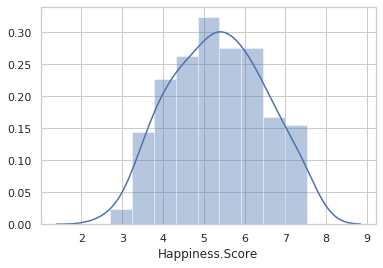

In [79]:
#Happiness Score
sns.distplot(data['Happiness.Score'])

We see that the target variable Happiness.Score has a no skewed distribution. This is not always our case for target varibale sometime it happens we have right or left skewed distribution. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. In addition, linear algorithms assume constant variance in the error term. Alternatively, we can also confirm this skewed behavior using the skewness metric.

In [80]:
#skewness
print("The skewness of SalePrice is {}".format(data['Happiness.Score'].skew()))


The skewness of SalePrice is 0.009553789803284616


In [81]:
#separate variables into new data frames
numeric_data = data.select_dtypes(include=[np.number])
cat_data = data.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 11 numeric and 1 categorical columns in train data


Now, we are interested to learn about the correlation behavior of numeric variables. Out of 38 variables, I presume some of them must be correlated. If found, we can later remove these correlated variables as they won't provide any useful information to the model.

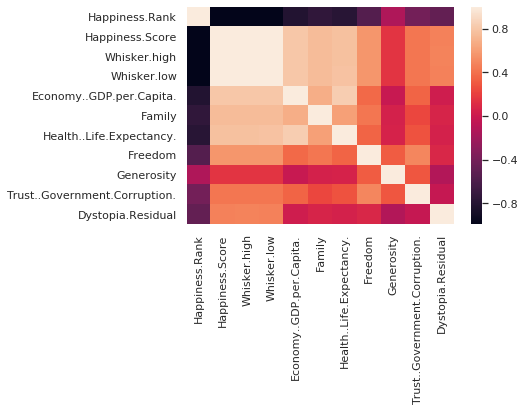

In [82]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

Notice the last row of this map. We can see the correlation of all variables against Happiness.Score. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [83]:
print (corr['Happiness.Score'].sort_values(ascending=False))

Happiness.Score                  1.000000
Whisker.low                      0.999520
Whisker.high                     0.999497
Economy..GDP.per.Capita.         0.812469
Health..Life.Expectancy.         0.781951
Family                           0.752737
Freedom                          0.570137
Dystopia.Residual                0.475355
Trust..Government.Corruption.    0.429080
Generosity                       0.155256
Happiness.Rank                  -0.992774
Name: Happiness.Score, dtype: float64


Here we see that the Whisker.low and Whisker.high feature is 99% correlated with the target variable Well, this make sense as well. People usually consider these parameters for their Happiness. In addition, Economy of the country is 70% correlated with the target variable.


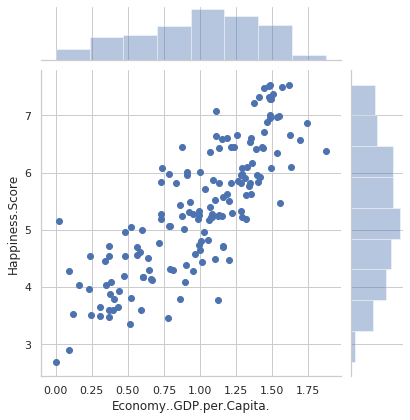

In [84]:
sns.jointplot(x=data['Economy..GDP.per.Capita.'], y=data['Happiness.Score'])

As seen above, here also we see a direct correlation of Economy..GDP.per.Capita with Happiness.Score. I've seen outliers play a significant role in spoiling a model's performance. Hence, we'll get rid of it. If you are enjoying this activity, you can visualize other correlated variables as well. Now, we'll move forward and explore categorical features. The simplest way to understand categorical variables is using .describe() command.

In [85]:
cat_data.describe()

,Country
count,155
unique,155
top,Bosnia and Herzegovina
freq,1


Let's check the median sale price of a house based on its SaleCondition. SaleCondition explains the condition of sale. Not much information is given about its categories.

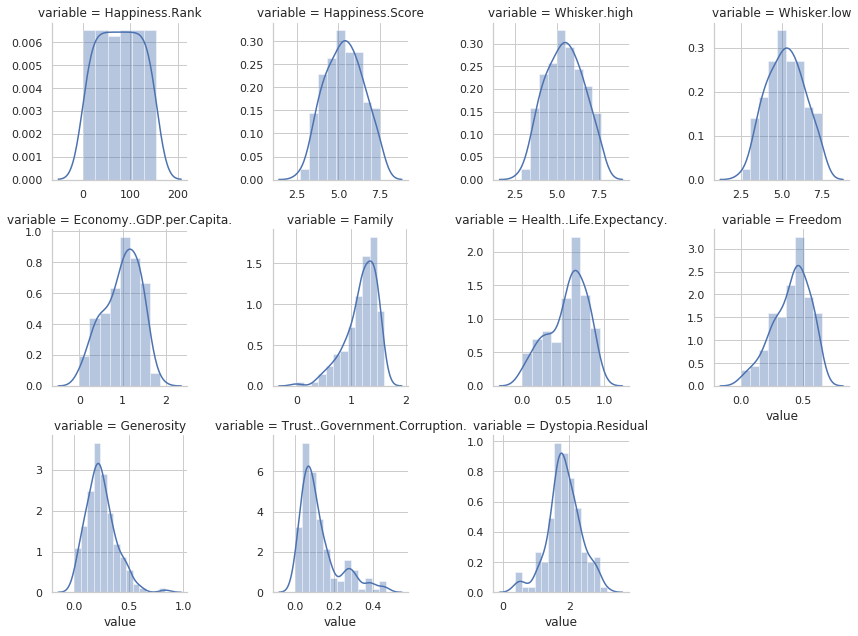

In [86]:
#create numeric plots
num = [f for f in data.columns if data.dtypes[f] != 'object']
nd = pd.melt(data, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

As you can see, some of the variables are right skewed and some of left skewed. We'll have to transform them in the next stage. Now, let's create boxplots for visualizing categorical variables.

## 5. Data Pre-Processing


In this stage, we'll deal with outlier values, encode variables, impute missing values, and take every possible initiative which can remove inconsistencies from the data set. If you remember, we discovered that the variable GrLivArea has outlier values. Precisely, one point crossed the 4000 mark. Let's remove that:

In [87]:
# Encoding Categorical Data
le = LabelEncoder() 
  
data['Country']= le.fit_transform(data['Country']) 

X = data.iloc[:, :-1].values
Y = data.iloc[:, 11].values

In [88]:
# check the encoding categorical Data
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,104,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,37,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,57,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,132,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,44,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


## 6. Feature Engineering


There are no libraries or sets of functions you can use to engineer features. Well, there are some but not as effective. It's majorly a manual task but believe me, it's fun. Feature engineering requires domain knowledge and lots of creative ideas. The ideas for new features usually develop during the data exploration and hypothesis generation stages. The motive of feature engineering is to create new features which can help make predictions better.

## 7. Model Training and Evaluation


### Split the Data Into Training and Test Subsets

In this step we will split our dataset into _training_ and _testing_ subsets (in proportion 80/20%).

Training data set will be used for training of our linear model. Testing dataset will be used for validating of the model. All data from testing dataset will be new to model and we may check how accurate are model predictions.

In [89]:
#split the dataset into x and y
x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(
        X, Y, test_size=0.25,random_state=42)

In [90]:
#Using sklearn linear regression model

algorithms = {'LinearRegression()':'LinearRegression', 'linear_model.Lasso(alpha=0.1)' : 'Lasso LinearRegression', 
              'LassoCV()' : 'LassoCV LinearRegression', 'DecisionTreeRegressor()': 'DecisionTree', 'SVR()':'SVR'}
acc_train_test = []
r2_train_test = []
results =  {}
for key, value in algorithms.items():
        model = eval(key)
        reg = model.fit(x_data_train,y_data_train) # training the dataset
        y_pred_train =  reg.predict(x_data_train)  # predicting the results
        y_pred_test =  reg.predict(x_data_test)
        
        r2_train_test.append([value, (r2_score(y_data_train,y_pred_train),r2_score(y_data_test,y_pred_test)), 
                              (reg.score(x_data_train,y_data_train), reg.score(x_data_test,y_data_test))])
results.update({"data": r2_train_test})        
x = PrettyTable()
x.field_names = ["Algorithm", "R2Score (Train/Test)", "Accuracy (Train/Test)"]
r2score = results['data']
for val in range(0 , len(r2score)):
    r2_value = str(math.floor(r2score[val][2][0]*100)) + '/' + str(math.floor(r2score[val][2][1]*100))
    acc_value = str(math.floor(r2score[val][1][0]*100)) + '/' + str(math.floor(r2score[val][1][1]*100))
    x.add_row([r2score[val][0], r2_value, acc_value])
print(x)    

+--------------------------+----------------------+-----------------------+
|        Algorithm         | R2Score (Train/Test) | Accuracy (Train/Test) |
+--------------------------+----------------------+-----------------------+
|     LinearRegression     |        99/99         |         99/99         |
|  Lasso LinearRegression  |        24/28         |         24/28         |
| LassoCV LinearRegression |        85/78         |         85/78         |
|       DecisionTree       |        99/37         |         99/37         |
|           SVR            |        93/-2         |         93/-2         |
+--------------------------+----------------------+-----------------------+


## Step 8: Save model to the pickle file

In [91]:
# save the model to disk
with open('world_happiness_prediction.pkl','wb') as f:
    pickle.dump(model,f)

## Step 9: Test the model


In [92]:
# load the model from disk
loaded_model = pickle.load(open('world_happiness_prediction.pkl', 'rb'))
result = loaded_model.score(x_data_test, y_data_test)
print(result)

-0.017216539874395753


## Summary

The project has been created to help people understand the complete process of machine learning / data science modeling. These steps ensure that you won't miss out any information in the data set and would also help another person understand your work.

## References

<p>Hackerearth machine learning project <a href="https://www.hackerearth.com/practice/machine-learning/machine-learning-projects/python-project/tutorial/">here</a></p>

<p>World happiness dataset <a href="https://www.kaggle.com/unsdsn/world-happiness/data#2017.csv">here</a></p>

<p>Machine learning code <a href="https://github.com/Deepakchawla/Machine-Learning-Problems">here</a></p>
